In [177]:
from PIL import Image
import io
import numpy as np

import selenium
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [178]:
selenium.__version__

'3.141.0'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mining_screen = plt.imread('alien_images/1.png')

In [7]:
loading_screen = plt.imread('alien_images/2.png')
finish_mining = plt.imread('alien_images/3.png')
finish_mining_2 = plt.imread('alien_images/4.png')

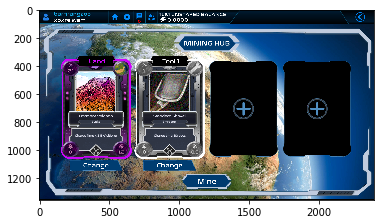

In [21]:
plt.imshow(mining_screen)

In [191]:
canvas = driver.find_element_by_id('unityContainer')


style_element = [x.strip() for x in canvas.get_attribute('style').split(';')]
width = int(style_element[0].split(' ')[-1][:-2])
height = int(style_element[1].split(' ')[-1][:-2])

In [189]:

canvas = driver.find_element_by_id('#canvas')
width = int(canvas.get_attribute('width'))
height = int(canvas.get_attribute('height'))

mining_height_ratio = 700 / height
mining_width_ratio = 1/2

In [350]:
canvas

<selenium.webdriver.remote.webelement.WebElement (session="58ca07ddf735d7a4da229b1335f50498", element="52978b02-ac65-4c9e-a8bc-cc94cc876272")>

In [349]:
width, height

(1036, 718)

In [ ]:
webdriver.W

In [200]:
def press_mining(posx=0, posy=0):
    action = webdriver.common.action_chains.ActionChains(driver)
    action.move_to_element_with_offset(canvas, posx, posy)
    action.click()
    action.perform()

In [340]:
mining_pos = (510, 600)
claim_pos = (510, 400)
return_to_mining_pos = (200, 560)

In [347]:
from IPython.display import clear_output

try:
    while True:
        clear_output(wait=True)
        print('Prepare to mine')
        while not check_if_can_mine():
            time.sleep(20)
        press_mining(*mining_pos)

        print('Prepare to claim')
        while not check_if_can_claim():
            time.sleep(20)
        press_mining(*claim_pos)

        print('Prepare to return')
        while not check_if_can_return():
            time.sleep(20)
        press_mining(*return_to_mining)
except KeyboardInterrupt:
    pass

Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
Prepare to claim
559 518
Prepare to return
559 518
Prepare to mine
559 518
P

KeyboardInterrupt: 

In [348]:
1

1

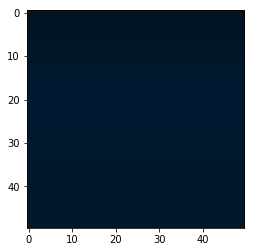

In [321]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

claim_button = np.asarray(img)

plt.imshow(claim_button[350:400, 350:400])

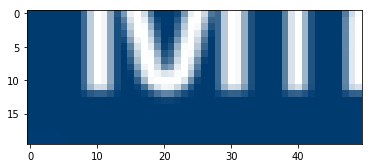

In [333]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

return_to_mine = np.asarray(img)

plt.imshow(return_to_mine[680:700, 250:300])

In [334]:
plt.imsave('alien_images/return_to_mine', return_to_mine[680:700, 250:300])

In [325]:
plt.imsave('alien_images/claim_button', claim_button[400:450, 400:450])

In [337]:
mining_button_ref = plt.imread('alien_images/mining_button.png')
claim_button_ref = plt.imread('alien_images/claim_button.png')
return_to_mine_ref = plt.imread('alien_images/return_to_mine.png')

def check_if_can_mine():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.
    return (np.mean(np.abs(mining_button_ref - mining_button)) < 0.01)

def check_if_can_claim():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[400:450, 400:450].astype(np.float32) / 255.
    return (np.mean(np.abs(claim_button_ref - mining_button)) < 0.01)

def check_if_can_return():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[680:700, 250:300].astype(np.float32) / 255.
    return (np.mean(np.abs(return_to_mine_ref - mining_button)) < 0.01)

In [341]:
press_mining(*return_to_mining_pos)

559 518


In [339]:
check_if_can_return()

True

In [303]:
data = driver.get_screenshot_as_png()
img = Image.open(io.BytesIO(data))
tmp = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.

In [281]:
np.mean(mining_button_ref - tmp) < 1e-8

True

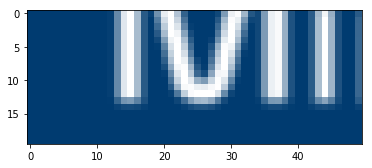

In [291]:
plt.imshow(mining_button_ref)